In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df=pd.read_csv("temp.csv")

In [ ]:
df.head()

,YEAR,JAN,FEB,MAR,APR,MAY,JUN,JUL,AUG,SEP,OCT,NOV,DEC,ANNUAL,JAN-FEB,MAR-MAY,JUN-SEP,OCT-DEC
0,1901,22.40,24.14,29.07,31.91,33.41,33.18,31.21,30.39,30.47,29.97,27.31,24.49,28.96,23.27,31.46,31.27,27.25
1,1902,24.93,26.58,29.77,31.78,33.73,32.91,30.92,30.73,29.80,29.12,26.31,24.04,29.22,25.75,31.76,31.09,26.49
2,1903,23.44,25.03,27.83,31.39,32.91,33.00,31.34,29.98,29.85,29.04,26.08,23.65,28.47,24.24,30.71,30.92,26.26
3,1904,22.50,24.73,28.21,32.02,32.64,32.07,30.36,30.09,30.04,29.20,26.36,23.63,28.49,23.62,30.95,30.66,26.40
4,1905,22.00,22.83,26.68,30.01,33.32,33.25,31.44,30.68,30.12,30.67,27.52,23.82,28.30,22.25,30.00,31.33,26.57


In [ ]:
df.shape

(117, 18)

In [ ]:
df.columns

Index(['YEAR', 'JAN', 'FEB', 'MAR', 'APR', 'MAY', 'JUN', 'JUL', 'AUG', 'SEP',
       'OCT', 'NOV', 'DEC', 'ANNUAL', 'JAN-FEB', 'MAR-MAY', 'JUN-SEP',
       'OCT-DEC'],
      dtype='object')

In [ ]:
month_order = ['JAN','FEB','MAR','APR','MAY','JUN','JUL','AUG','SEP','OCT','NOV','DEC']
df_long = df.melt(id_vars=['YEAR'], value_vars=month_order,
                  var_name='Month', value_name='Temperature')
month_mapping = {name: i+1 for i, name in enumerate(month_order)}
df_long['Month'] = df_long['Month'].map(month_mapping)
X = df_long[['Month']]
y = df_long['Temperature']


In [ ]:
df_long.head()

,YEAR,Month,Temperature
0,1901,1,22.40
1,1902,1,24.93
2,1903,1,23.44
3,1904,1,22.50
4,1905,1,22.00


In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error

In [ ]:
X_train ,X_test,y_train,y_test=train_test_split(X,y,test_size=0.2,random_state=42)

In [ ]:
lr=LinearRegression()
lr.fit(X_train,y_train)

LinearRegression()

In [ ]:
ypred=lr.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,ypred)
mae=mean_absolute_error(y_test,ypred)
r2=r2_score(y_test,ypred)

In [ ]:
print("MSE:",mse)
print("MAE:",mae)
print("R2 Score:",r2)

MSE: 9.999806682283973
MAE: 2.705271869781447
R2 Score: -0.005573628993982727


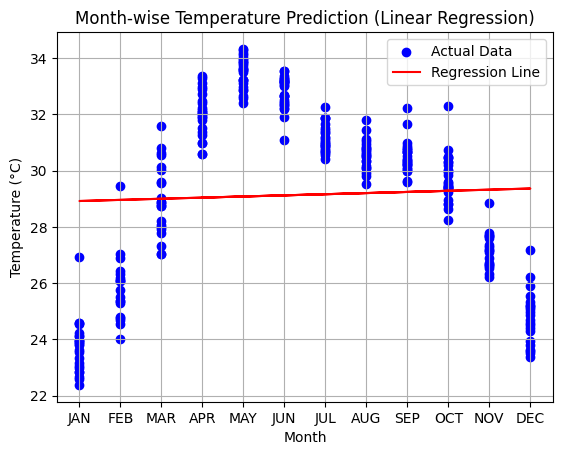

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.plot(X_test, ypred, color='red', label='Regression Line')
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Month-wise Temperature Prediction (Linear Regression)")
plt.xticks(np.arange(1, 13), month_order)
plt.legend()
plt.grid(True)
plt.show()


In [ ]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
dt=DecisionTreeRegressor(random_state=1)
dt.fit(X_train,y_train)


DecisionTreeRegressor(random_state=1)

In [ ]:
y_pred=dt.predict(X)


In [ ]:
mse=mean_squared_error(y,y_pred)
mae=mean_absolute_error(y,y_pred)
r2=r2_score(y,y_pred)

In [ ]:
print("MSE:",mse)
print("MAE:",mae)
print("R2 Score:",r2)

MSE: 0.5990321269308723
MAE: 0.5777873942800262
R2 Score: 0.9410311136038445


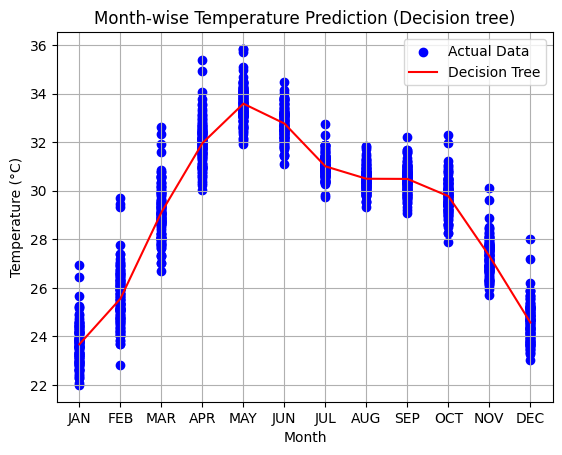

In [ ]:
plt.scatter(X, y, color='blue', label='Actual Data')
plt.plot(X, y_pred, color='red', label='Decision Tree')
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Month-wise Temperature Prediction (Decision tree)")
plt.xticks(np.arange(1, 13), month_order)
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
rf=RandomForestRegressor(random_state=1)
rf.fit(X_train,y_train)

RandomForestRegressor(random_state=1)

In [ ]:
y_pred_rf=rf.predict(X_test)

In [ ]:
mse=mean_squared_error(y_test,y_pred_rf)
mae=mean_absolute_error(y_test,y_pred_rf)
r2=r2_score(y_test,y_pred_rf)

In [ ]:
print("MSE:",mse)
print("MAE:",mae)
print("R2 Score:",r2)

MSE: 0.633181181981094
MAE: 0.5924574557683562
R2 Score: 0.9363277392048541


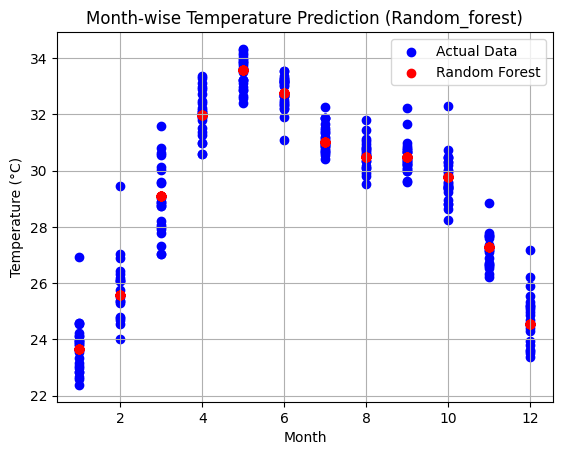

In [ ]:
plt.scatter(X_test, y_test, color='blue', label='Actual Data')
plt.scatter(X_test, y_pred_rf, color='red', label='Random Forest')
plt.xlabel("Month")
plt.ylabel("Temperature (°C)")
plt.title("Month-wise Temperature Prediction (Random_forest)")

plt.legend()
plt.grid(True)
plt.show()